# Data Exploration

In [3]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import libraries for computation and visualization
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time

In [4]:
df = pd.read_csv("241data.csv")
df.head()

,ID,Gender,Gender_num,City,Recruiter,Cluster_ID,pre_step_avg,step_avg,step_avg2,step_avg3,...,treat_positive,treat_negative,Compliance,num_read_emails,treat_dose,weight,age,used_ctr_before,activity_level,activity_level_num
0,1,M,1,Minneapolis,Hyera,22,16972,15544,16521,18064,...,0,0,1,4,0,160,32,1,H,2
1,2,M,1,New York,Hyera,13,12197,14953,15568,16476,...,1,0,1,3,3,160,42,0,H,2
2,3,M,1,San Francisco,Giles,104,6146,14852,14186,14645,...,1,0,1,4,4,155,40,1,T,3
3,4,F,0,New York,Hyera,16,9136,12982,12104,9370,...,1,0,1,4,4,120,28,0,M,1
4,5,M,1,Montreal,Hyera,24,12815,12961,12771,12333,...,0,0,1,4,0,155,33,1,M,1


In [5]:
df_corr = df.copy()
df_corr.drop('ID', axis=1, inplace=True)
df_corr.drop('Gender', axis=1, inplace=True)
df_corr.drop('Recruiter', axis=1, inplace=True)
df_corr.drop('treat_dose', axis=1, inplace=True)

# Correlation matrix - quick view

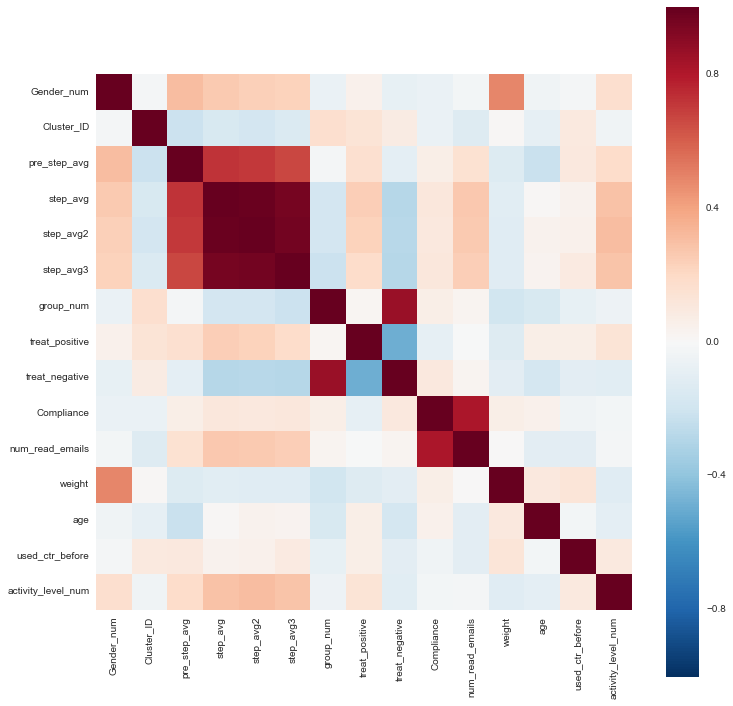

In [6]:
# Calculate the correlation matrix
cm = df_corr.corr()
plt.figure(figsize=(12,12))
sns.heatmap(cm, square=True)
plt.yticks(rotation=0)
a= plt.xticks(rotation=90)

**Observations**
1. The dark cells (some are aggregate of squares), expected correlation of "opposite"or "similar" fields like pre_step and step averages, group_num (0,1,2 for control, treat1, treat2) and treatment variables.
2. The only covariates field with some potential correlation seem to be gender and weight


# Data Exploration

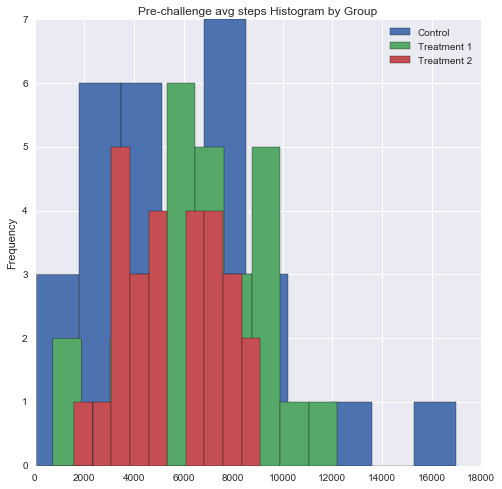

In [7]:
groups = ['Control', 'Treatment 1', 'Treatment 2']
for i in np.arange(0,3,1):
    df[df.group == groups[i]]['pre_step_avg'].plot(kind='hist',figsize=(8,8),title='Pre-challenge avg steps Histogram by Group')
plt.legend(groups)

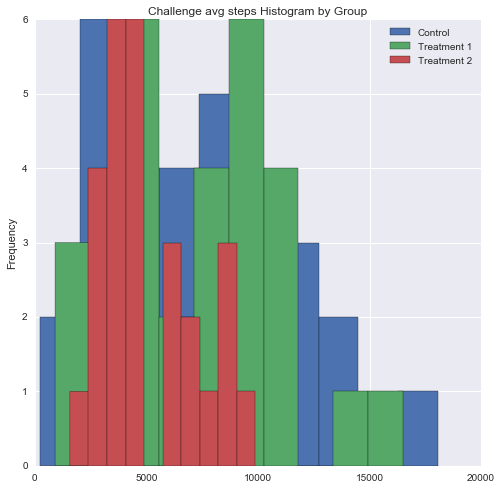

In [8]:
groups = ['Control', 'Treatment 1', 'Treatment 2']
for i in np.arange(0,3,1):
    df[df.group == groups[i]]['step_avg3'].plot(kind='hist',figsize=(8,8),title='Challenge avg steps Histogram by Group')
plt.legend(groups)

In [9]:
df['change'] = df.step_avg3 - df.pre_step_avg

In [10]:
df.columns

Index([u'ID', u'Gender', u'Gender_num', u'City', u'Recruiter', u'Cluster_ID',
       u'pre_step_avg', u'step_avg', u'step_avg2', u'step_avg3', u'group',
       u'group_num', u'treat_positive', u'treat_negative', u'Compliance',
       u'num_read_emails', u'treat_dose', u'weight', u'age',
       u'used_ctr_before', u'activity_level', u'activity_level_num',
       u'change'],
      dtype='object')

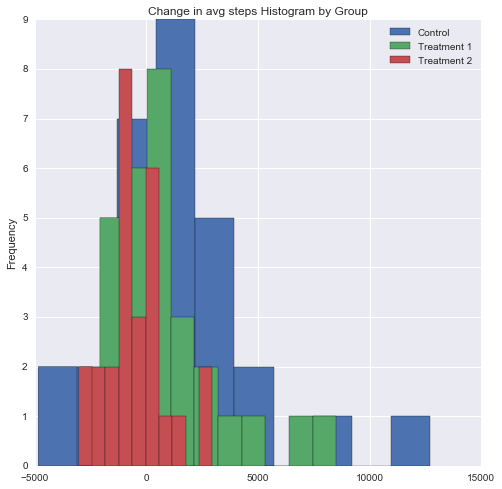

In [11]:
groups = ['Control', 'Treatment 1', 'Treatment 2']
for i in np.arange(0,3,1):
    df[df.group == groups[i]]['change'].plot(kind='hist',figsize=(8,8),title='Change in avg steps Histogram by Group')
plt.legend(groups)

In [1]:
?plt.axis()

Object `plt.axis` not found.


Histograms of the covariates for each group (Control, Treatment 1, Treatment 2)


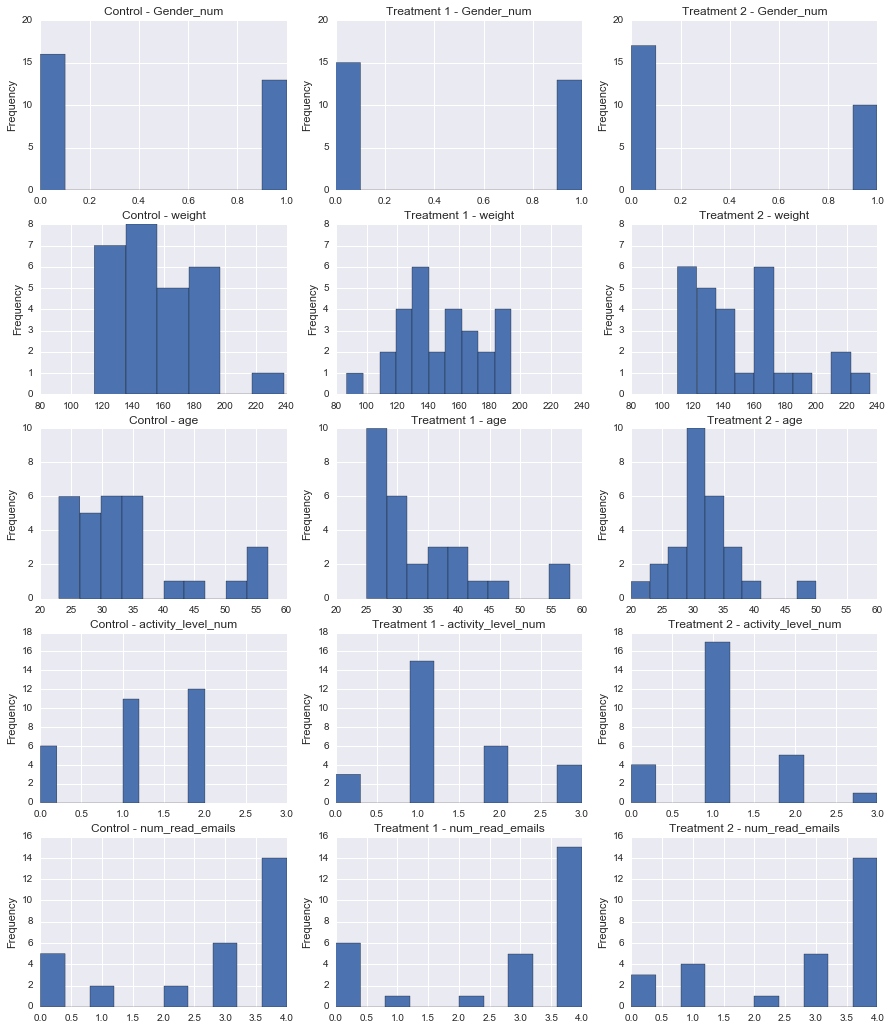

In [14]:
print 'Histograms of the covariates for each group (Control, Treatment 1, Treatment 2)'
covariates = ['Gender_num', 'weight', 'age', 'activity_level_num', 'num_read_emails']
plt.figure(1,figsize=(15,25))
j=1
for c in range(len(covariates)):
    for i in np.arange(0,3,1):
        plt.subplot(7,3,i+1+(c)*3)
        df[df.group == groups[i]][covariates[c]].plot(kind='hist')
        j+=1
        plt.title(str(groups[i]) + ' - ' + str(covariates[c]))
        if c == 0:
            plt.axis([0, 1, 0, 20])
        elif c == 1:
            plt.axis([80, 240, 0, 8])
        elif c == 2:
            plt.axis([20, 60, 0, 10])
        elif c == 3:
            plt.axis([0, 3, 0, 18])
        elif c == 4:
            plt.axis([0, 4, 0, 16])
        else:
            plt.axis('off')

plt.show()

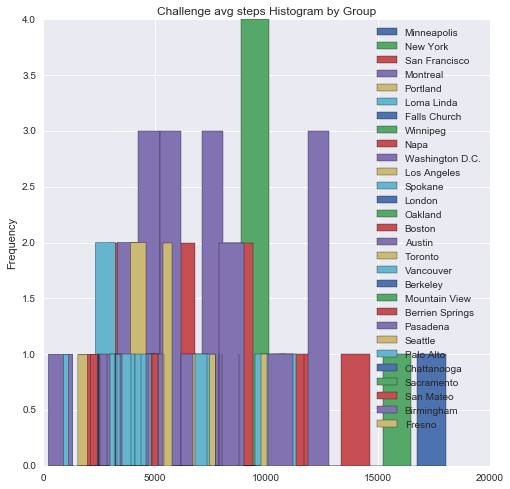

In [51]:
cities = df.City.unique()
for i in np.arange(0,len(cities),1):
    df[df.City == cities[i]]['step_avg3'].plot(kind='hist',figsize=(8,8),title='Challenge avg steps Histogram by Group')
plt.legend(cities)